- results are shown here
  - [cluster_analysis.ipynb](./nb/cluster_analysis.md)
  - we try maultple cluster groups [2, 3, 5, 9, 15, 20]
    - the number of cluster groups is always a topic of debate 
    - it depends on the complexity and specificity of the intended analysis 
    - also simplicity is important as simple results are easy to understand 
    - i suggest 5 clusters as a good compromise.  

region cluster analysis for the mosaic campaign 
- loosely based on the method described in
  - https://acp.copernicus.org/preprints/acp-2021-126/
- data and flexpart analysis obtained from 
  - https://srvx1.img.univie.ac.at/webdata/mosaic/mosaic.html

In [17]:
%load_ext autoreload
%autoreload 2

# import matplotlib as mpl
# import matplotlib.colors
import matplotlib.pyplot as plt
# import numpy as np
# import pandas as pd
# import seaborn as sns
import xarray as xr

import funs as fu
import os 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload



## constants and functions

In [2]:

PATH_TO_FILE = '/Users/aliaga/Downloads/AIRTRACER_100m.nc'

LA = 'lat'
LO = 'lon'
TI = 'time'
AG = 'age'
AT = 'AIRTRACER'
L = 'lab'
CM = 'tab20'

DATA_OUT = '../data_out'



# code

In [3]:


# def main():

In [4]:

ds = xr.open_mfdataset(PATH_TO_FILE)

In [5]:
# lets check lat and lon borders
for l in LO, LA:
    a = ds[l].diff(l).to_series().describe()
    print(f'{l}\n{a}\n\n')

lon
count    719.0
mean       0.5
std        0.0
min        0.5
25%        0.5
50%        0.5
75%        0.5
max        0.5
Name: lon, dtype: float64


lat
count    119.00
mean       0.25
std        0.00
min        0.25
25%        0.25
50%        0.25
75%        0.25
max        0.25
Name: lat, dtype: float64




## overall residence time
Lets start by plotting the the sum over time of the flexpart output

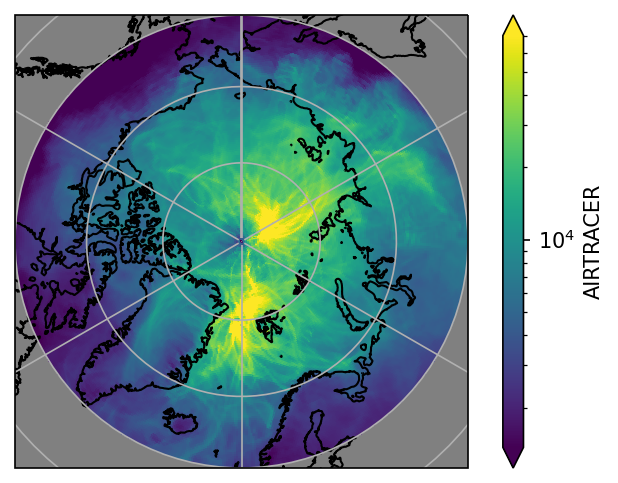

In [6]:

# sum over time and age and load the file in memory
d1 = ds.sum([TI, AG])[AT]
d1.load()
# plot a sum over the campaign
fu.plot_map(d1)

## the ship's path
Lets identify the path taken by the boat. We can euristically determine this 
by using the maximum residence time of the flexpart output at each time step.

/Users/aliaga/py-packs/flexpart-mosaic/nb/funs.py:92: UserWarning: Use the colorbar set_ticks() method instead.
  cb.ax.set_yticks(ii)
/Users/aliaga/py-packs/flexpart-mosaic/nb/funs.py:96: UserWarning: FixedFormatter should only be used together with FixedLocator
  cb.ax.set_yticklabels(pd.to_datetime(cb.get_ticks()).strftime(date_format='%b %Y'))


[1.570e+18 1.575e+18 1.580e+18 1.585e+18 1.590e+18 1.595e+18 1.600e+18]


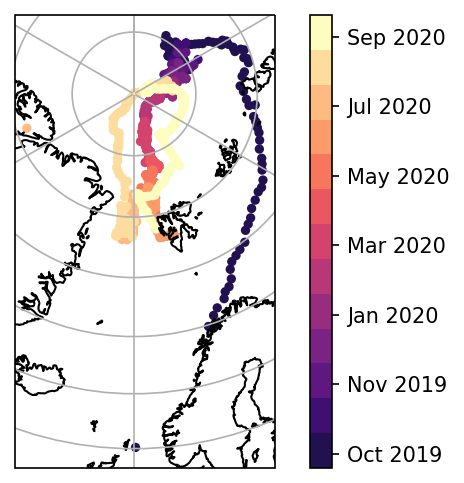

In [7]:
# find the ship path on a euristic basis
d = ds[AT][{AG: 0}].load()
am = d.argmax(dim=[LO, LA])
df = d[am].to_dataframe()
fu.plot_path(df, LO, LA)

## some distributions
Lets also explore the distributions of single 'pixels'.
They seem to be log distributions. 

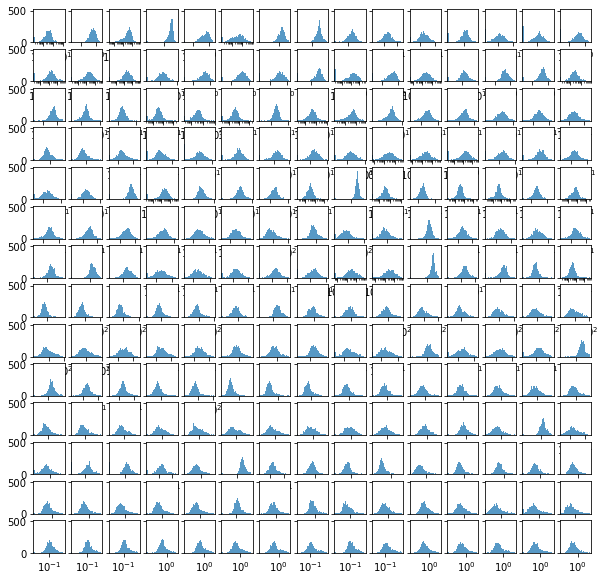

In [8]:
d2 = ds[AT].sum(AG).load()
fu.plot_some_distributions(d2, LA, LO)

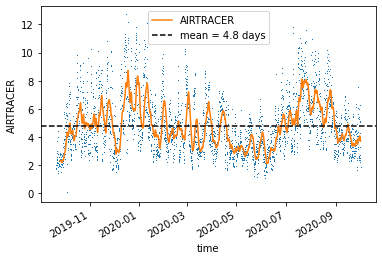

In [9]:

# plot the residence times
fu.plot_residence_time(d2, LA, LO)

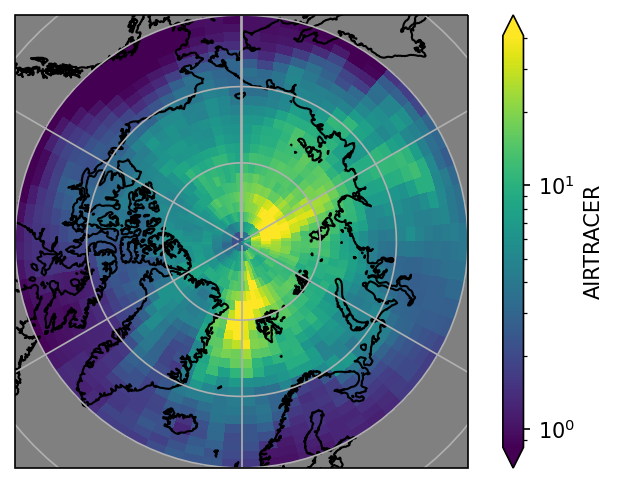

In [10]:
# coarse the array to reduce number of data points and also transform the
# residence from seconds to days
d3 = d2.coarsen({LA: 5, LO: 10}, boundary='exact').sum() / 3600 / 24
# plot the coarse array
fu.plot_map(d3.sum(TI))

In [11]:
qta = fu.get_quantiles(d3, TI)

In [50]:
d4

<xarray.DataArray 'AIRTRACER' (time: 3021, lat: 24, lon: 72)>
array([[[4.26856306e-04, 1.85237499e-04, 1.57487550e-04, ...,
         3.45609005e-04, 2.62172340e-04, 2.94322817e-04],
        [4.05232160e-04, 1.80768722e-04, 1.36057846e-04, ...,
         2.10795479e-04, 2.24026400e-04, 2.52277910e-04],
        [3.61863727e-04, 2.04149459e-04, 1.27263134e-04, ...,
         1.74721019e-04, 2.10013648e-04, 3.26951529e-04],
        ...,
        [7.69419270e-03, 3.71179022e-02, 1.75597873e-02, ...,
         1.21264247e-05, 1.14259865e-05, 1.51676786e-05],
        [1.30783888e-02, 1.78087298e-02, 3.67819853e-02, ...,
         1.65508281e-05, 5.97014034e-04, 5.37065417e-03],
        [1.34951333e-02, 1.61234215e-02, 2.09297184e-02, ...,
         1.44446630e-03, 6.16978481e-03, 1.13525642e-02]],

       [[3.53972660e-04, 1.81746029e-04, 1.59313335e-04, ...,
         3.26880021e-04, 1.96002293e-04, 2.68310105e-04],
        [3.48604284e-04, 1.92284395e-04, 1.42720295e-04, ...,
         1.87309241e-04, 1.70050320e-04, 2.74389778e-04],
        [3.32216179e-04, 2.07002158e-04, 1.38843257e-04, ...,
         1.54415306e-04, 1.70071828e-04, 3.15803365e-04],
...
        [6.65379994e-05, 8.02154755e-05, 8.25178067e-05, ...,
         8.04794181e-05, 7.29859967e-05, 8.08176919e-05],
        [3.55511111e-05, 4.24132995e-05, 4.11761284e-05, ...,
         3.54101030e-05, 3.79649973e-05, 3.83658007e-05],
        [1.04874916e-05, 1.18511416e-05, 1.11409418e-05, ...,
         1.06170073e-05, 1.20733139e-05, 9.38947505e-06]],

       [[6.39781181e-04, 6.08601200e-04, 1.02682703e-03, ...,
         5.54469298e-04, 4.92891180e-04, 4.37205978e-04],
        [6.05336914e-04, 4.21026722e-04, 6.51540060e-04, ...,
         5.96815662e-04, 6.16054924e-04, 5.51735400e-04],
        [6.32890093e-04, 5.10873098e-04, 6.53335650e-04, ...,
         6.35226665e-04, 6.15459343e-04, 6.33831311e-04],
        ...,
        [5.48863201e-04, 5.27090277e-04, 3.88656161e-04, ...,
         4.38846793e-04, 4.23238380e-04, 5.14067418e-04],
        [1.85856246e-04, 8.90085721e-05, 5.46838237e-05, ...,
         4.67922917e-04, 3.81165737e-04, 2.67075578e-04],
        [1.80601448e-04, 1.13191149e-04, 8.57115301e-05, ...,
         2.32536506e-04, 2.55131425e-04, 2.13211562e-04]]], dtype=float32)
Coordinates:
  * lon      (lon) float64 2.5 7.5 12.5 17.5 22.5 ... 342.5 347.5 352.5 357.5
  * lat      (lat) float64 60.62 61.88 63.12 64.38 ... 85.62 86.88 88.12 89.38
  * time     (time) datetime64[ns] 2019-09-20T09:00:00 ... 2020-10-01T21:00:00
    lab      (lat, lon) object 'b' 'b' 'b' 'a' 'a' 'a' ... 'a' 'a' 'a' 'a' 'a'
    lat0     (lat) float64 60.0 61.25 62.5 63.75 65.0 ... 85.0 86.25 87.5 88.75
    lat1     (lat) float64 61.25 62.5 63.75 65.0 66.25 ... 86.25 87.5 88.75 90.0
    lon0     (lon) float64 0.0 5.0 10.0 15.0 20.0 ... 340.0 345.0 350.0 355.0
    lon1     (lon) float64 5.0 10.0 15.0 20.0 25.0 ... 345.0 350.0 355.0 360.0

# plot and save cluster from [2, 3, 5, 6, 9, 15, 20]

/Users/aliaga/py-packs/flexpart-mosaic/nb/funs.py:338: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


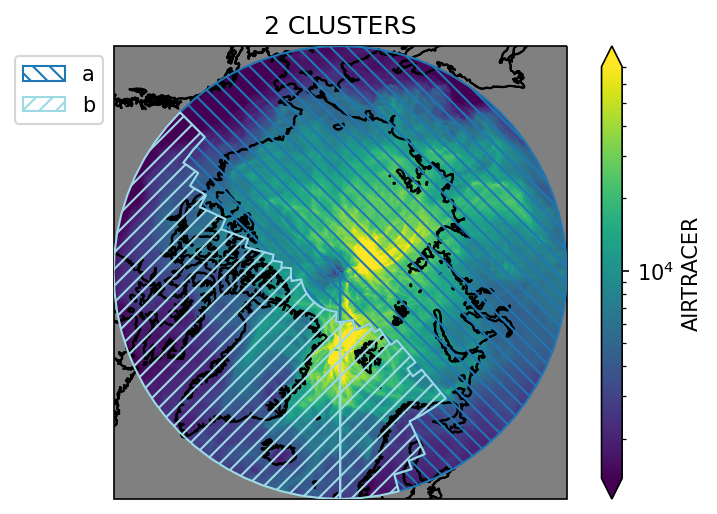

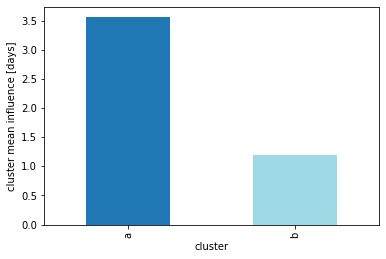

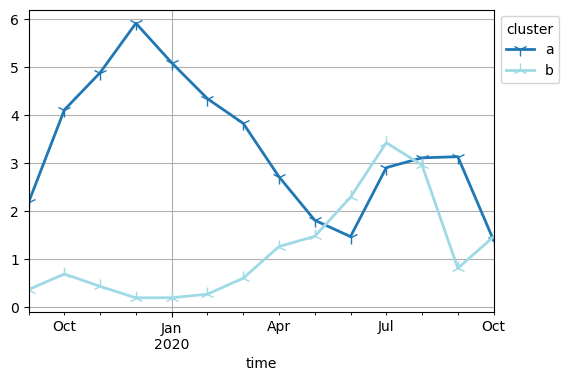

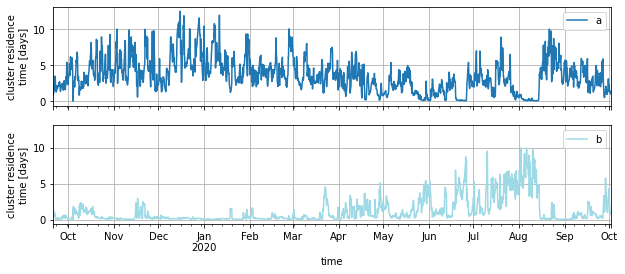

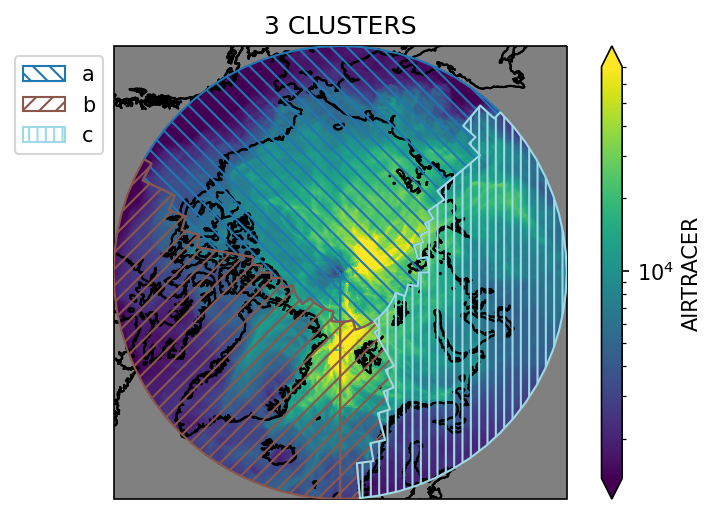

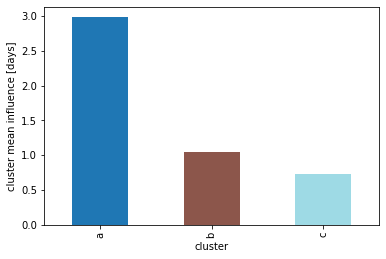

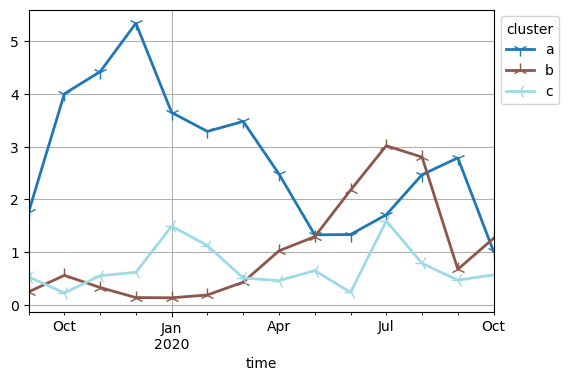

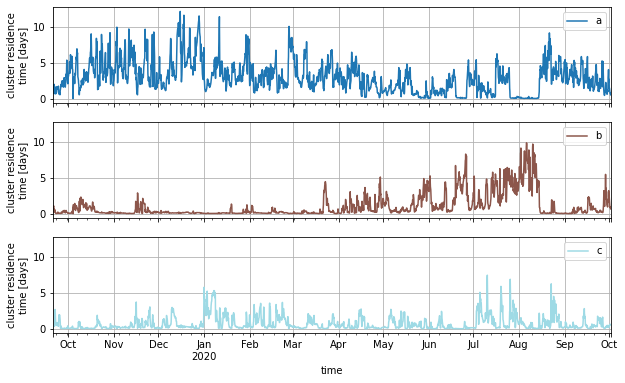

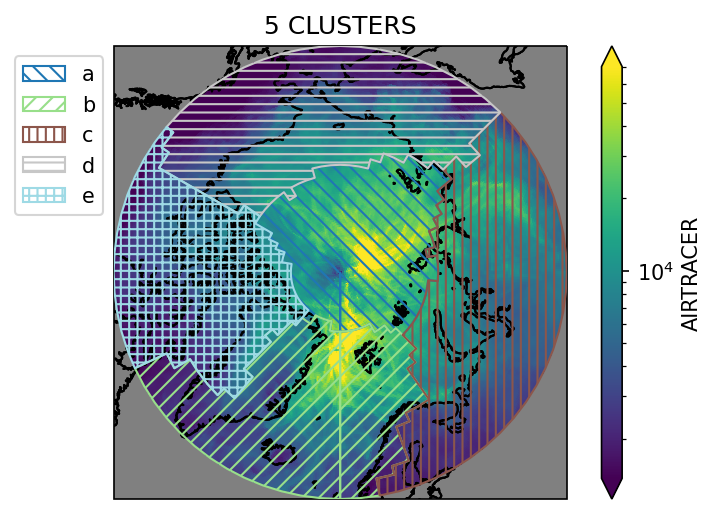

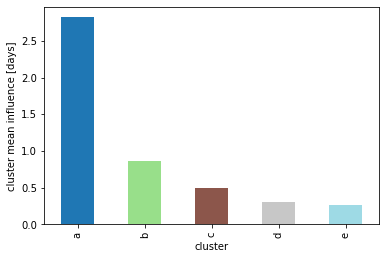

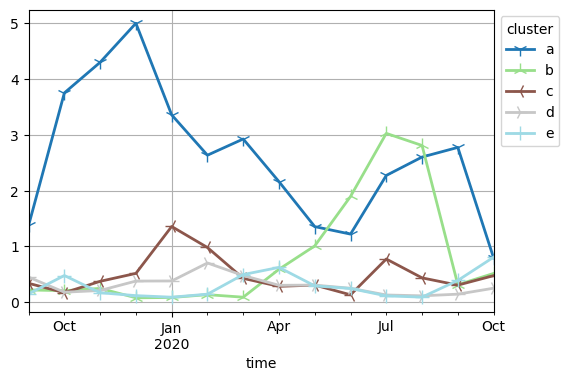

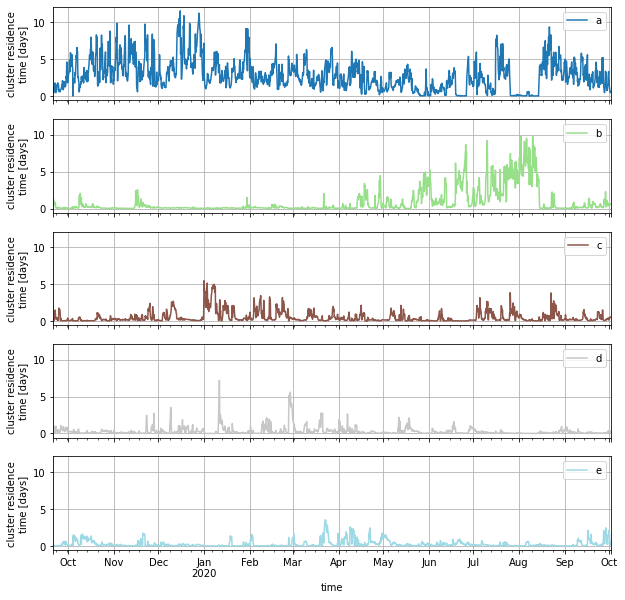

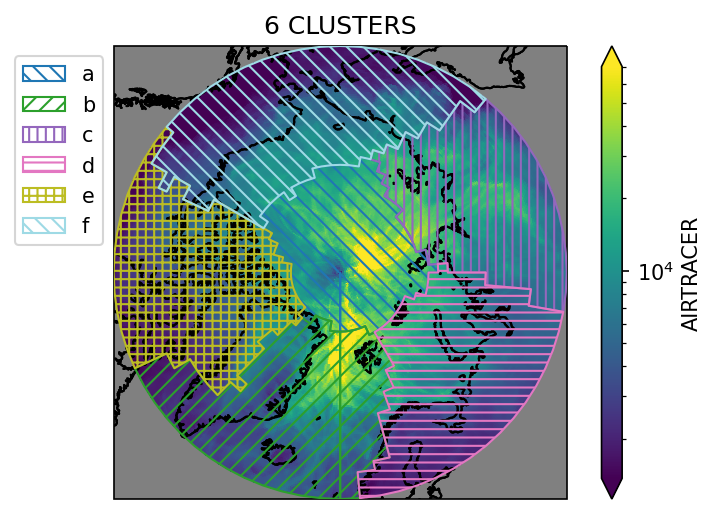

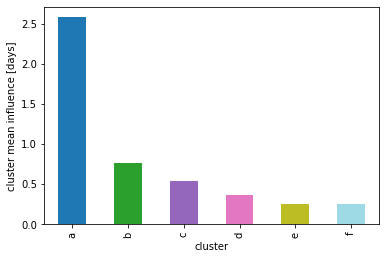

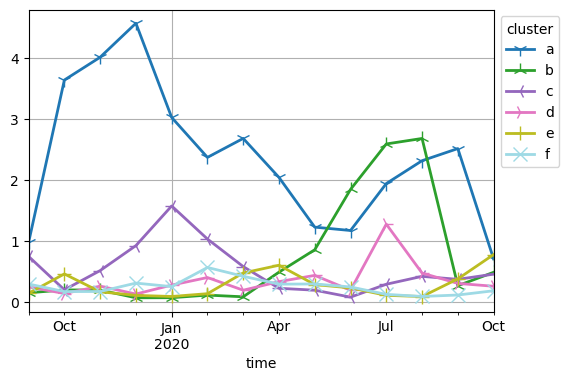

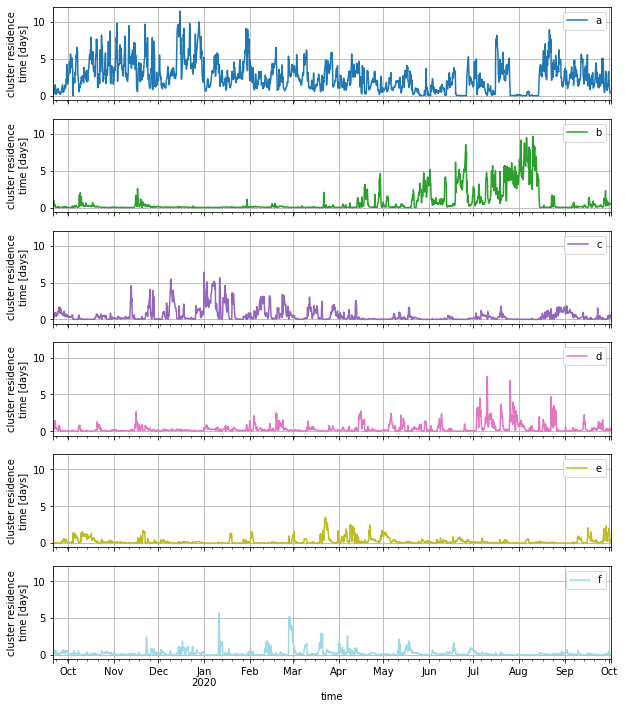

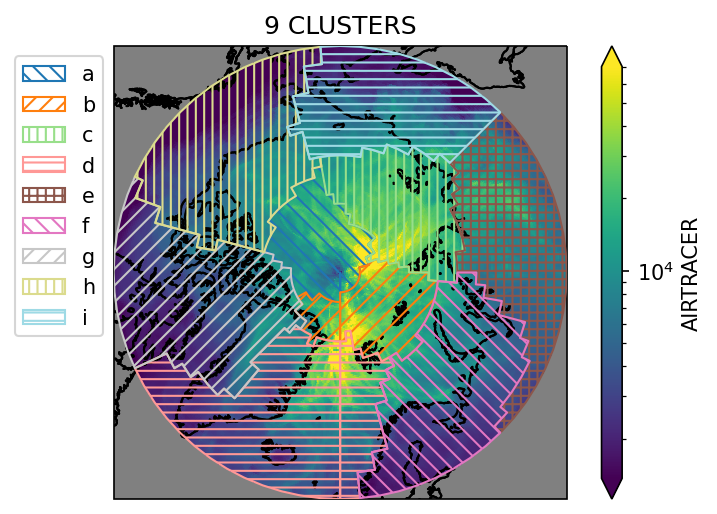

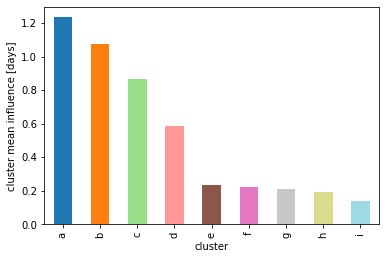

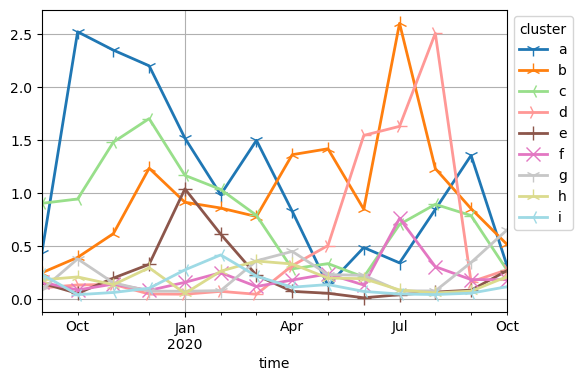

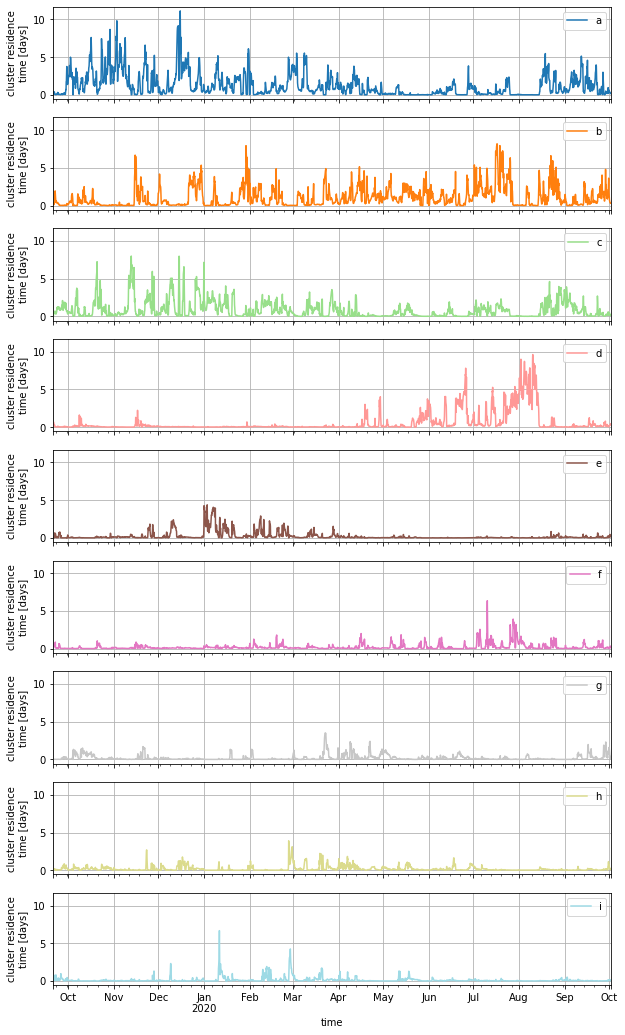

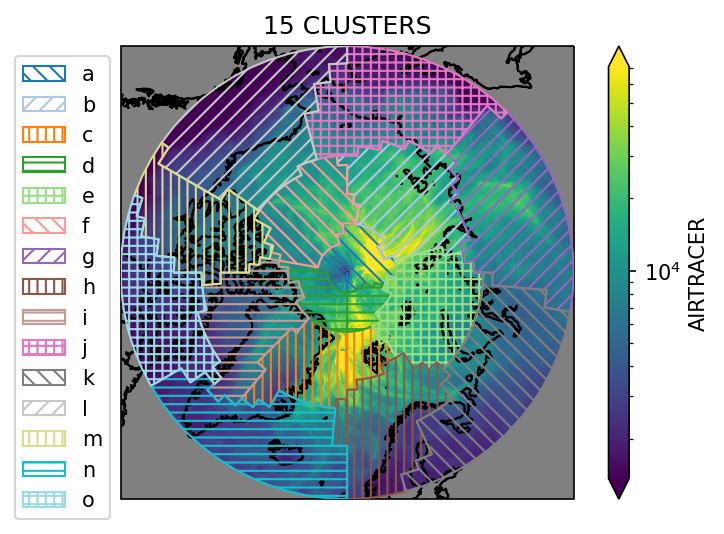

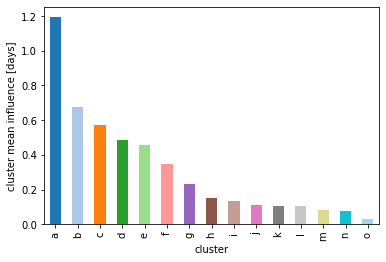

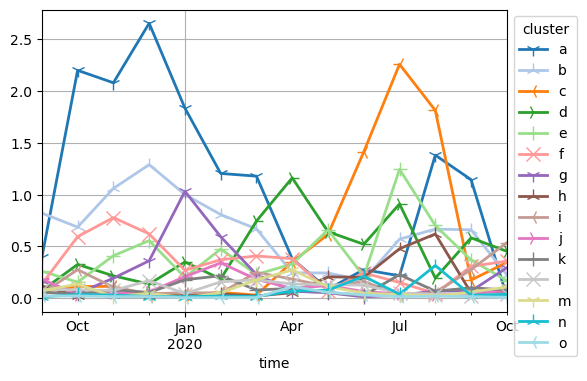

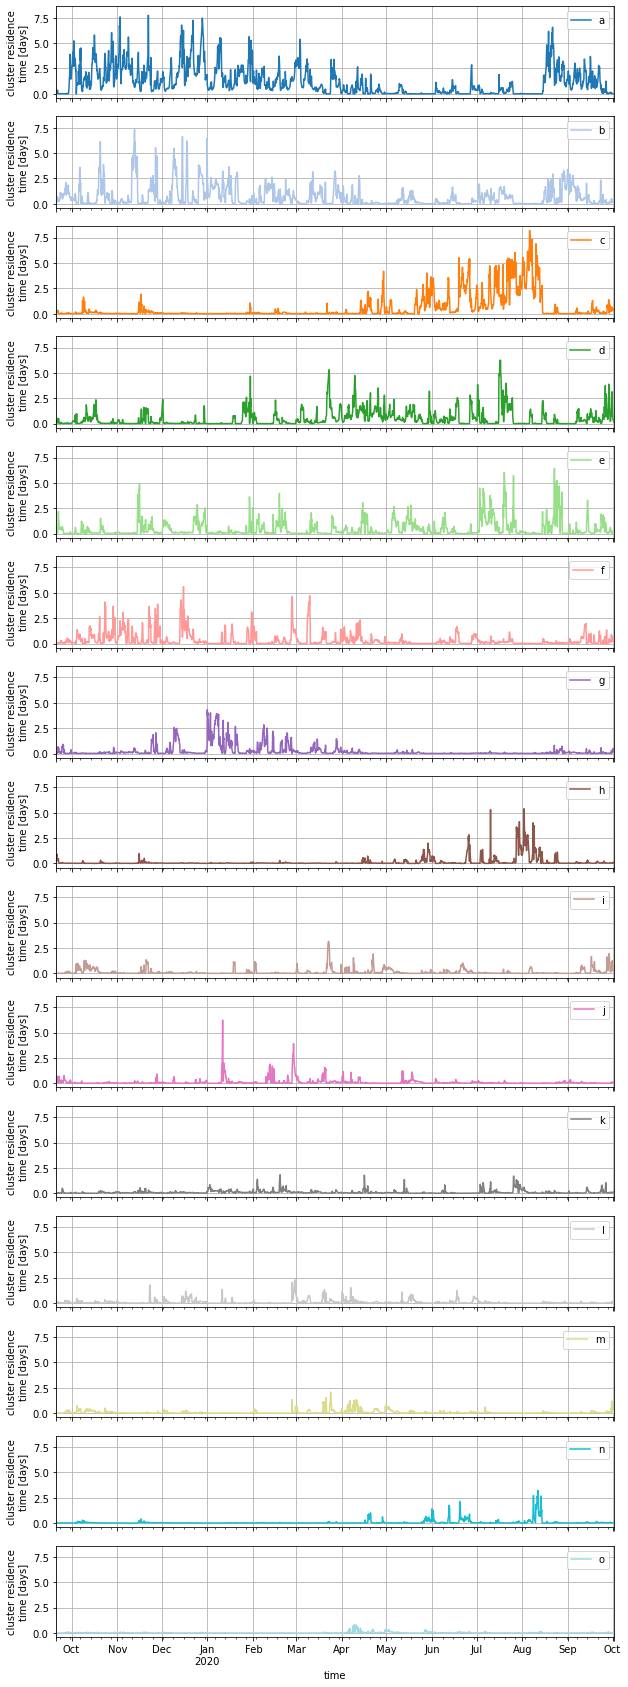

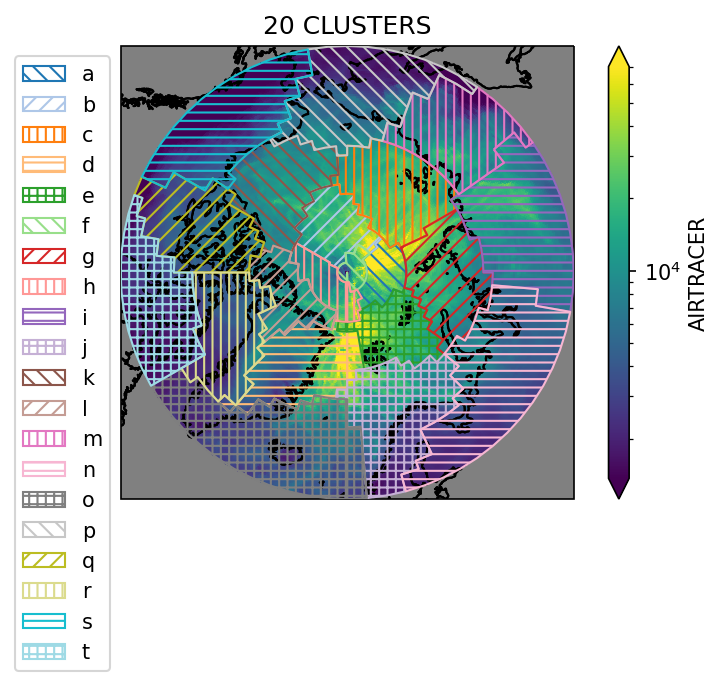

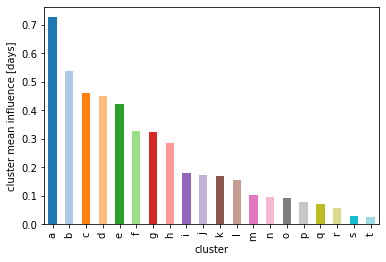

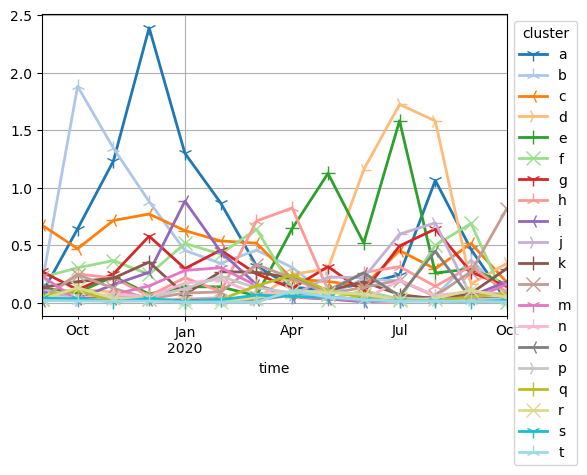

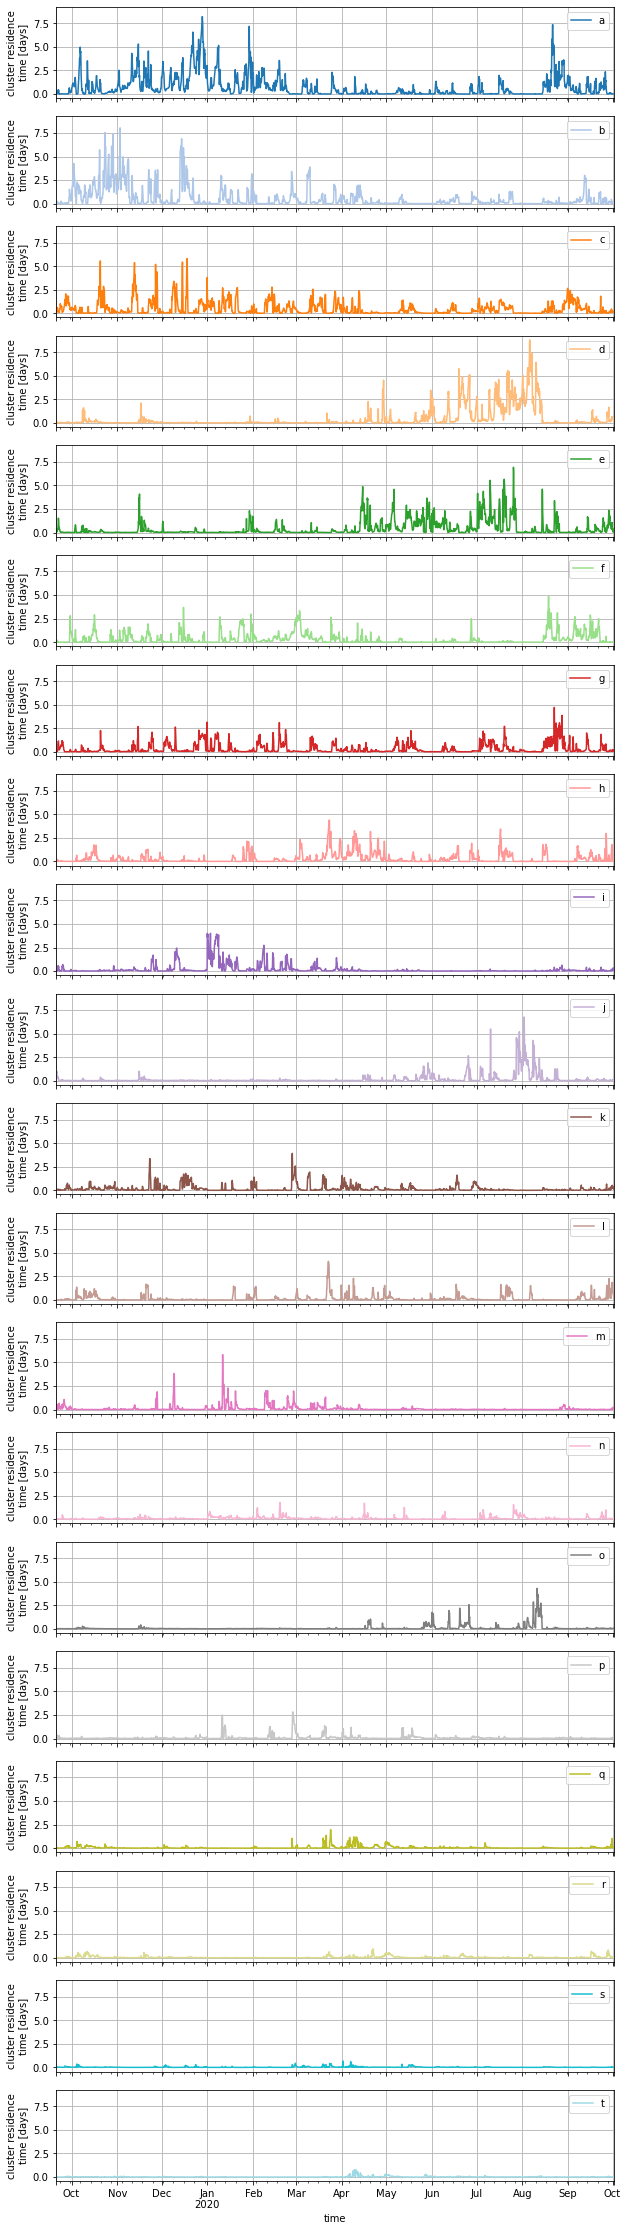

In [58]:

for N in [2, 3, 5, 6, 9, 15, 20]:
# for N in [2]:
    d4 = fu.kmeans_cluster(N, qta, d3, L, TI, )
    fu.save_cluster_csv(d4, N, DATA_OUT, L)
    lax = d4[L]
#     fu.plot_kmap(lax, N, CM)
    fu.plot_hatch(d4, L, N, d1, LA, LO, CM)
    fu.plot_cluster_bar(N, d4, L, CM)
    fu.plot_month_means(d4, L, CM, N)
    fu.plot_cluster_ts(N, d4, L, CM)